# Overview of the models for the Football Match Prediction model training project

Trained Models:
- Logistic Regression
- Random Forest
- Decision Tree
- SVM
- AdaBoost on Decision Tree
- AdaBoost on Logistic Regression
- Gradient Boost
- MLP

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob


In [71]:
#Upload all data for the first model training.
path = "./clean_data"
csv_files = glob.glob(path + "/*.csv", recursive = True)
all_df = [pd.read_csv(f) for f in csv_files]
pd.set_option('display.max_columns', None)
all_df  = pd.concat(all_df, ignore_index=True)
all_df=all_df.dropna()
all_df['Capacity']=all_df['Capacity'].astype('str')
all_df.Capacity = all_df.Capacity.apply(lambda x : x.replace(',',''))
all_df.Capacity = all_df.Capacity.apply(lambda x : x.replace('.0',''))
all_df['Capacity']=all_df['Capacity'].astype('int64')
all_df.head(10)

,Outcome,Home_Team,Away_Team,Season,Round,Capacity,Pitch,Country,Elo_home,Elo_away,HT_Cum_Cards,HT_Cum_Scores,HT_Cum_Wins,HT_Cum_Draws,HT_Cum_Losses,HT_Cum_Streak,HT_Longest_Win_Streak,HT_Longest_Loss_Streak,AT_Cum_Cards,Cum_Scores,AT_Cum_Wins,AT_Cum_Draws,AT_Cum_Losses,AT_Cum_Streak,AT_Longest_Win_Streak,AT_Longest_Loss_Streak
0,-1,Barcelona B,Almería,2013,1,6000,1,6,53.0,65.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
1,-1,Mirandés,Huesca,2013,1,5759,1,6,54.0,51.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,1,Villarreal,RM Castilla,2013,1,24500,1,6,69.0,55.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,0,Girona,Sabadell,2013,1,11056,1,6,52.0,46.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,1,Lugo,Hércules,2013,1,7250,1,6,47.0,61.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
5,1,Xerez,Recreativo,2013,1,5700,1,6,59.0,62.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
6,-1,Racing,Las Palmas,2013,1,22222,1,6,65.0,55.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
7,1,Numancia,Real Sporting,2013,1,8727,1,6,59.0,64.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
8,0,Alcorcón,CD Guadalajara,2013,1,5000,1,6,56.0,47.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
9,1,Elche,Ponferradina,2013,1,33732,1,6,59.0,52.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


The list of all data presented above has been used to train models. 
The used features didn't inlcude teams' names, season and resultant streak.
The outcome column is the y vector, used for train/test model.

## Visual analysis of the data:
1. Check for any NA values
 

<AxesSubplot:>

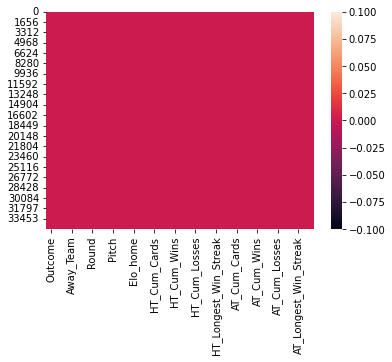

In [72]:
sns.heatmap(all_df.isnull())

2. Overview of the distribution of all features, there are couple of notes:
- Natural Grass Pitch is the most common, the feature might be not essential
- Capacity, Round, EOL_home and EOL_away are the only normal distributed (Gaussian)  features.
- Considering most of the features are cummulation of the previous results, it is clear they are not normaly distributed
- Capacity is the only feature with extremely large X values, that should be scaled 


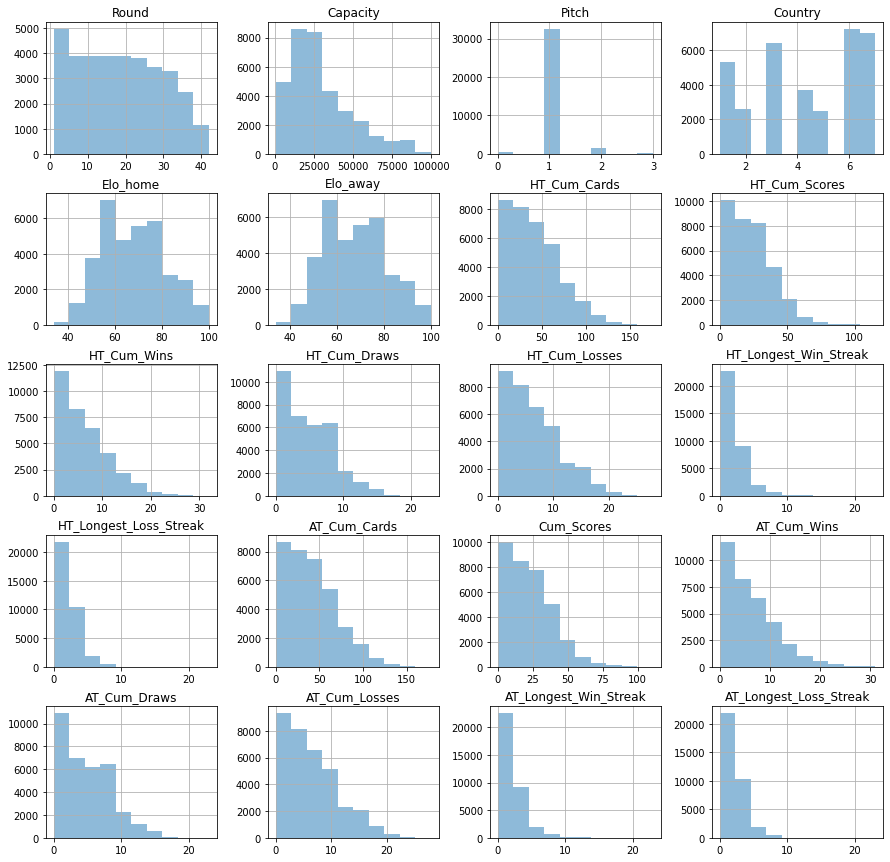

In [73]:

hist_df=all_df.drop(['Outcome','Season','Home_Team', 'Away_Team','HT_Cum_Streak','AT_Cum_Streak'], axis=1)
hist_df.hist(alpha=0.5, figsize=(15, 15))
plt.show()

3. Indication of the distribution of the outcomes overall

[Text(0.5, 1.0, 'Countplot of Output Variable "Outcomes" for the all data')]

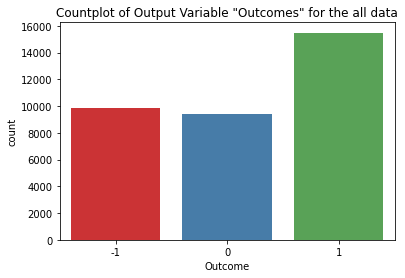

In [74]:
sns.countplot(x='Outcome', data=all_df, palette='Set1').\
    set(title='Countplot of Output Variable "Outcomes" for the all data')

4. Correlation matrix between columns
Correlation matrix shows certain level of positive correlation between Home_team data sets and Away_team data sets.
This is totally explainable and acceptable as both sets have similar group of teams. 

<AxesSubplot:>

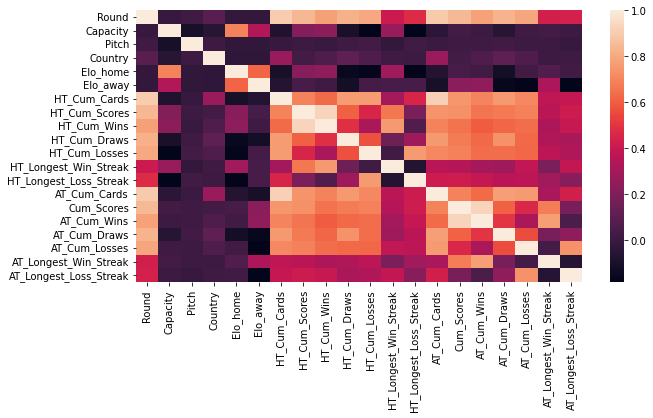

In [75]:
Y=all_df.Outcome
X=all_df.drop(['Outcome', 'Season','HT_Cum_Streak','AT_Cum_Streak','Home_Team','Away_Team'],axis=1)
plt.figure(figsize = (10,5))
sns.heatmap(X.corr(), xticklabels=X.columns, yticklabels=X.columns)

## Upload models accuracy data

In [76]:
accuracy=pd.read_csv('model_accuracy.csv')
accuracy 

,League,Model,Train_Accuracy,Test_Accuracy
0,All,DTree_Scaler,0.445323,0.446426
1,All,AdaBoost_DTree,0.504045,0.495326
2,All,MLP,0.501996,0.493888
3,segunda_division,MLP,0.499515,0.493168
4,eredivisie,MLP,0.500449,0.493456
...,...,...,...,...
176,championship,SVM_Ext,0.494552,0.492018
177,championship,DTree_Scaler,0.445323,0.446426
178,championship,AdaBoost_DTree,0.504045,0.495326
179,championship,AdaBoost_LogReg,0.495487,0.491155


## Overview of all models:


OVERFITTING: 
According to the plot below, Random Forest model is really works on overfitting the data. Therefore it shows large delta between test and train accuracy scores.
Gradient Booster, is the second model that tries to overfit, however not as significant as Random Forest.

<function matplotlib.pyplot.show(close=None, block=None)>

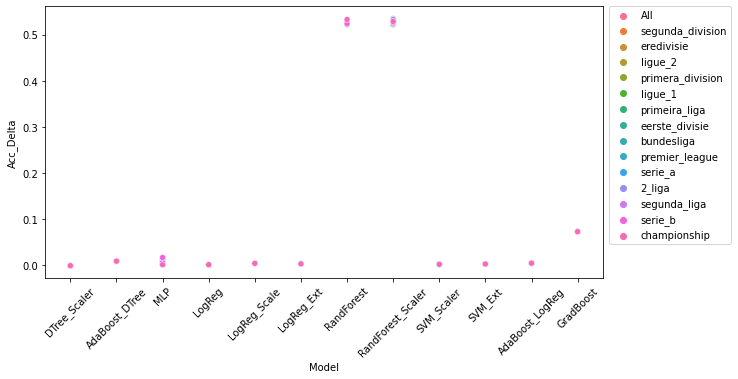

In [77]:

accuracy['Acc_Delta']=accuracy['Train_Accuracy']-accuracy['Test_Accuracy']
plt.figure(figsize=(10, 5))
sns.scatterplot(data=accuracy, x='Model', y='Acc_Delta', hue='League')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

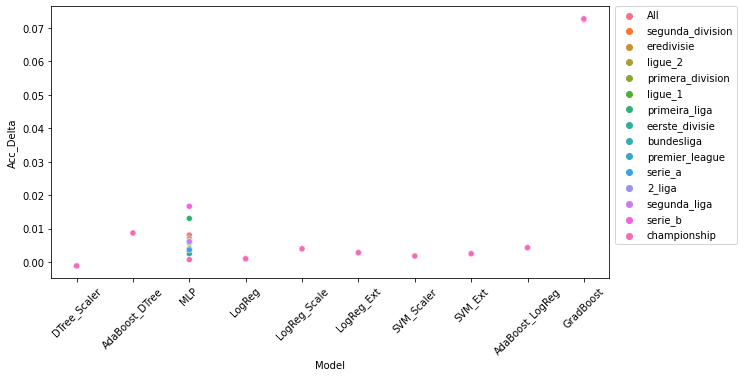

In [78]:
accuracy=accuracy.set_index('Model')
accuracy.drop(['RandForest','RandForest_Scaler'], inplace=True)
accuracy.reset_index(inplace = True)
plt.figure(figsize=(10, 5))
sns.scatterplot(data=accuracy, x='Model', y='Acc_Delta', hue='League')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.show


df_melt = accuracy.melt(id_vars=['League','Model'], value_vars=['Train_Accuracy', 'Test_Accuracy'])
g = sns.FacetGrid(df_melt, col = 'Model', row='League')
g.map(sns.barplot, 'variable', 'value')

As can be observed on plot below:
*Gradient Boost*, in addition to some overfitting, doesn't show the best accuracy result.
*Decision Tree* is another model with the lowest accuracy result.
Therefore, those two can be dropped as well.

<function matplotlib.pyplot.show(close=None, block=None)>

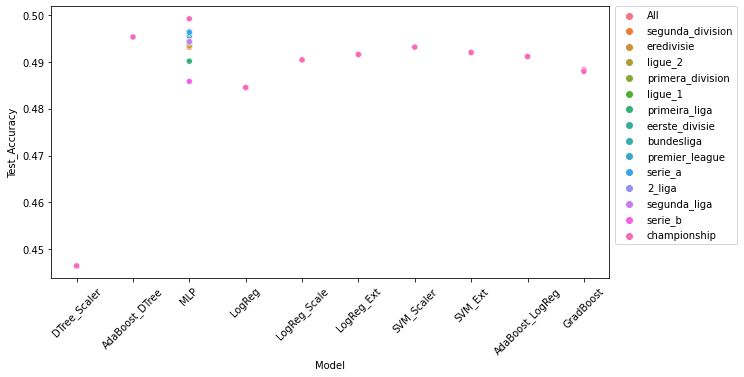

In [80]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=accuracy, x='Model', y='Test_Accuracy', hue='League')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.show

*AdaBoost on Decision Tree* and *SVM* are two strong models that show higher accuracy than others.
However, it is important to mention *MLP* as a model that shows interesting potential. Let's look at it a little further.

<function matplotlib.pyplot.show(close=None, block=None)>

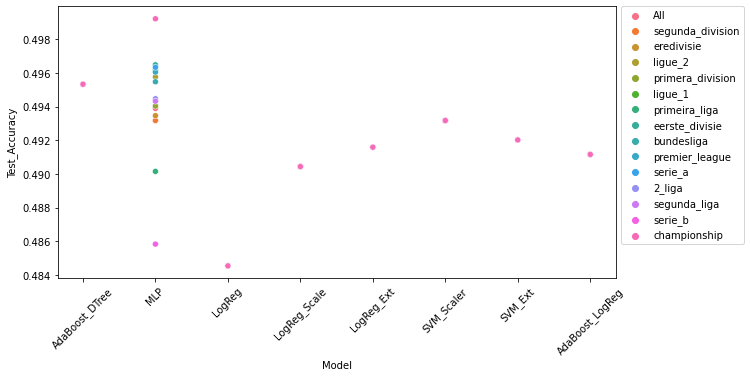

In [81]:
accuracy=accuracy.set_index('Model')
accuracy.drop(['GradBoost','DTree_Scaler'], inplace=True)
accuracy.reset_index(inplace = True)
plt.figure(figsize=(10, 5))
sns.scatterplot(data=accuracy, x='Model', y='Test_Accuracy', hue='League')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.show

## MLP

In [84]:
mlp_df=accuracy[accuracy['Model']=='MLP']
mlp_df=mlp_df.sort_values(by='Test_Accuracy', ascending=False)
mlp_df

,Model,League,Train_Accuracy,Test_Accuracy,Acc_Delta
15,MLP,championship,0.499982,0.499209,0.000773
8,MLP,eerste_divisie,0.499011,0.496476,0.002535
11,MLP,serie_a,0.500018,0.496333,0.003685
6,MLP,ligue_1,0.499515,0.496189,0.003326
10,MLP,premier_league,0.501888,0.496045,0.005843
4,MLP,ligue_2,0.499838,0.495757,0.004081
9,MLP,bundesliga,0.501169,0.495470,0.005699
12,MLP,2_liga,0.500809,0.494463,0.006346
13,MLP,segunda_liga,0.500485,0.494319,0.006166
5,MLP,primera_division,0.499838,0.494031,0.005807
